In [ ]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

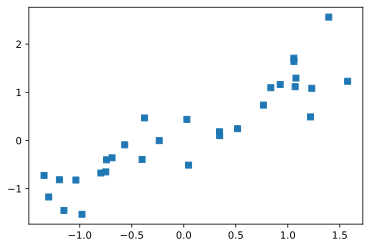

In [ ]:
# create data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot

plt.plot(x,y,'s')

In [ ]:
from torch.nn.modules.activation import ReLU
# build a model

ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # activation function
    nn.Linear(1,1) # outpun layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# learning rate
learningRate = 0.05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavour of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [ ]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

# Train the Model!
for epochi in range(numepochs):

  # forward pass
  yhat = ANNreg(x)

  # compute loss
  loss = lossfun(yhat,y)
  losses[epochi] = loss

  # backdrop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Final Loss = 0.182139')

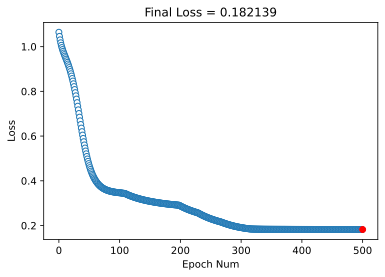

In [ ]:
# show the losses

# manually compute the losses
# final predictions
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.plot(numepochs, testloss.detach(),'ro')
plt.xlabel('Epoch Num')
plt.ylabel('Loss')
plt.title('Final Loss = %g' %testloss.detach())

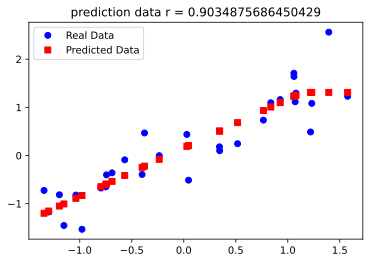

In [ ]:
# plot the data

plt.plot(x,y, 'bo', label= 'Real Data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predicted Data')
plt.title(f'prediction data r = {np.corrcoef(y.T,predictions.detach().T)[0,1]}')
plt.legend()

In [ ]:
np.corrcoef(y.T,predictions.detach().T)[0,1]

0.9034875686450429